In [1]:
%%time
import os
import codecs
import pandas as pd

from ml_tps.utils.text_processing import no_unique_words, no_words_with_word_part, most_frequent_words, word_frequency

from ml_tps.utils.data_processing import scale_dataset

from ml_tps.algorithms.k_means import KMeans
from ml_tps.algorithms.hierarchical_clustering import HierarchicalClustering
from ml_tps.algorithms.kohonen_net import KohonenNet

from ml_tps.utils.evaluation import getConfusionMatrix

print("Dependencies imported.")

Dependencies imported.
Wall time: 12.6 s


In [4]:
%%time

conj_subordinantes = ["porque", "pues", "ya", "puesto que", "a causa de", "debido a",
                      "luego", "conque", "así que",
                      "si",
                      "para que", "a fin de que",
                      "como", "que",
                      "aunque", "aun cuando", "si bien",
                      "que", "si"]
conj_coordinantes = ["ni", "y", "o", "o bien", "pero aunque", "no obstante", "sin embargo", "sino", "por el contrario"]
art_determinados = ["la", "el", "los", "las"]
art_indeterminados = ["un", "una", "unos", "unas"]

dir_path = os.path.dirname(os.path.realpath("e2.ipynb"))
filepath = f"{dir_path}/../tp4/data/"

data = []
i = 1
for author in ["Calderaro", "Fonteveccia", "Pagni", "Vanderkooy", "Verbitsky"]:
    for i in range(1, 11):
        extracted_text = codecs.open((filepath + author + "/" + author + str(i) + ".txt"),
                                     encoding="latin-1").read().lower()
        # extracted_words = extract_words_from_text(extracted_text, prevent_uppercase_duplicates=True)
        extracted_data = [author,
                          most_frequent_words(extracted_text, no_words=5, normalize=True).sum(),
                          no_unique_words(extracted_text, normalize=True),
                          word_frequency(extracted_text, list_of_words=conj_subordinantes, normalize=True, average=True),
                          word_frequency(extracted_text, list_of_words=conj_coordinantes, normalize=True, average=True),
                          word_frequency(extracted_text, list_of_words=art_determinados, normalize=True, average=True),
                          word_frequency(extracted_text, list_of_words=art_indeterminados, normalize=True, average=True),
                          no_words_with_word_part(extracted_text, word_part="mente", mode="ending", normalize=True)]
        data.append(extracted_data)

data = pd.DataFrame(data, columns=["Autor",
                                   "5 palabras más usadas",
                                   "Palabras distintas",
                                   "Conjunciones subord.",
                                   "Conjunciones coordinantes",
                                   "Artículos determinados",
                                   "Artículos indeterminados",
                                   "Adverbios terminados en -mente"])   # always using relative frequencies

data = scale_dataset(data, scaling_type="minmax", objective="Autor")
X = data.drop("Autor", axis=1)
y = data["Autor"]
data.head()

Wall time: 4.67 s


,5 palabras más usadas,Palabras distintas,Conjunciones subord.,Conjunciones coordinantes,Artículos determinados,Artículos indeterminados,Adverbios terminados en -mente,Autor
0,0.680729,0.313680,0.476924,0.697165,0.733993,0.108503,0.138600,Calderaro
1,0.689299,0.323582,0.809494,0.794584,0.427924,0.000000,0.000000,Calderaro
2,0.541973,0.654072,0.327488,1.000000,0.287942,0.249032,0.000000,Calderaro
3,0.739651,0.362624,0.672268,0.502522,0.434054,0.096497,0.488605,Calderaro
4,0.615397,0.338700,0.471989,0.121430,0.468765,0.288961,0.439061,Calderaro


## K-medias

In [6]:
%%time
k_means = KMeans()
k_means.fit(X, k=5)
k_means_predictions = k_means.predict(X)
conf_matrix_kmeans = getConfusionMatrix(predictions=k_means_predictions, actual=y)
k_means.plot(X, k_means_predictions)

conf_matrix_kmeans


## Agrupación Jerárquica

In [7]:
%%time
hc = HierarchicalClustering()
hc.fit(X, no_clusters=5)
hc_predictions = hc.predict(X)
conf_matrix_hc = getConfusionMatrix(predictions=hc_predictions, actual=y)

hc.plot(X, hc_predictions)
hc.plot_dendrogram()

conf_matrix_hc

## Red de Kohonen

Current eta =  0.14002800840280097
Current eta =  0.09950371902099892


IndexError: too many indices for array

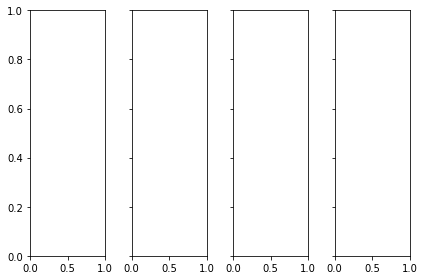

In [3]:
%%time
kohonen = KohonenNet()
kohonen.fit(X, side=4, min_eta = 0.1, alpha = 0.5)
kohonen.plot(pd.concat([y, X], axis=1), objective="Autor")